In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt





In [9]:
def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=target_size)
        if img is not None:
            images.append(img_to_array(img))
    return np.array(images)

train_images_path = r"C:\Users\anurag\Desktop\first_jupyter\train\image"
train_masks_path = r"C:\Users\anurag\Desktop\first_jupyter\train\label"
test_images_path = r"C:\Users\anurag\Desktop\first_jupyter\test\image"
test_masks_path = r"C:\Users\anurag\Desktop\first_jupyter\test\label"

# Load training and test data
train_images = load_images_from_folder(train_images_path)
train_masks = load_images_from_folder(train_masks_path)
test_images = load_images_from_folder(test_images_path)
test_masks = load_images_from_folder(test_masks_path)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Normalize masks (convert 255 to 1, assuming binary masks)
train_masks = (train_masks[:, :, :, 0] > 127).astype(np.uint8)  # Convert to 0 or 1 based on a threshold
test_masks = (test_masks[:, :, :, 0] > 127).astype(np.uint8)    # Convert to 0 or 1 based on a threshold

# Convert masks to categorical (one-hot encoding)
train_masks = to_categorical(train_masks, num_classes=2)
test_masks = to_categorical(test_masks, num_classes=2)

In [10]:
def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=-1)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=-1)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=-1)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=-1)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(2, 1, activation='softmax')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = unet_model()


In [11]:
model.fit(train_images, train_masks, batch_size=8, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5558 - loss: 0.6380 - val_accuracy: 0.7545 - val_loss: 0.5933
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7821 - loss: 0.7485 - val_accuracy: 0.7545 - val_loss: 0.5338
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7899 - loss: 0.5032 - val_accuracy: 0.7545 - val_loss: 0.5474
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7885 - loss: 0.5130 - val_accuracy: 0.7545 - val_loss: 0.5282
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7855 - loss: 0.4948 - val_accuracy: 0.7545 - val_loss: 0.5294
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7900 - loss: 0.4848 - val_accuracy: 0.7545 - val_loss: 0.5199
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7843 - loss: 0.4880 - val_accuracy: 0.7545 - val_loss: 0.5127
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7890 - loss: 0.4724 - val_accuracy: 0.7544 - val_loss: 0.4977
Epoch 9/50
3/3 

In [12]:
model.evaluate(test_images, test_masks)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8107 - loss: 0.3890


[0.3890053331851959, 0.8107055425643921]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


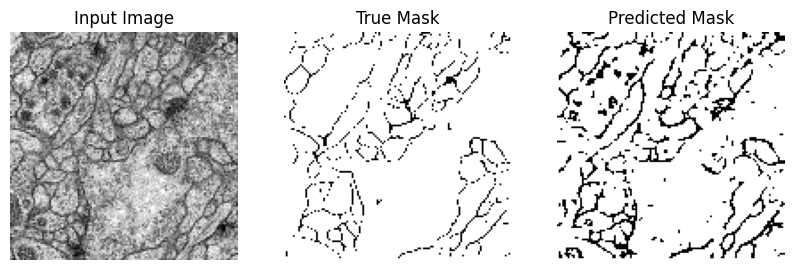

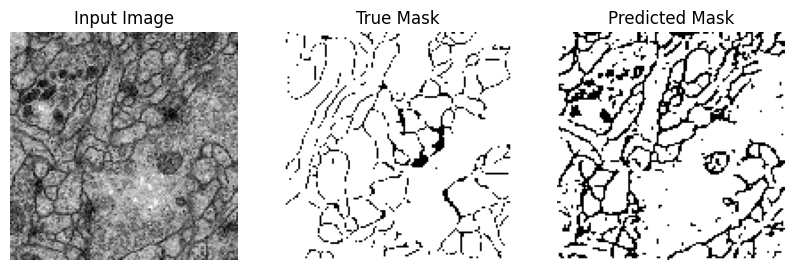

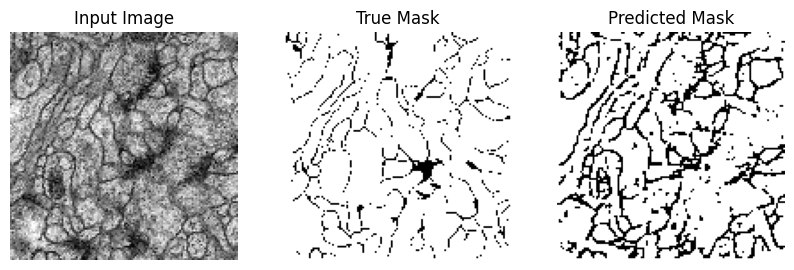

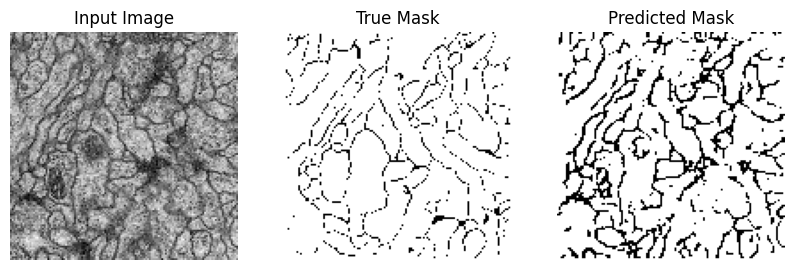

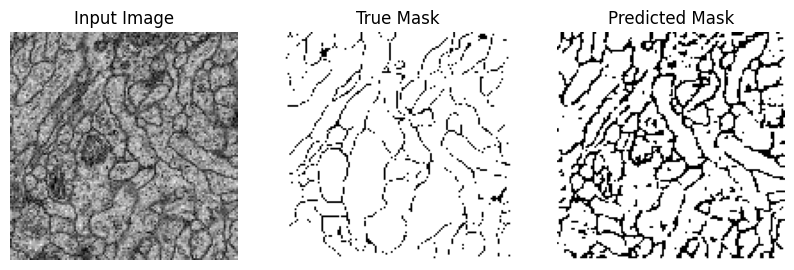

In [13]:
def plot_sample(image, mask, prediction):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(np.argmax(mask, axis=-1), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(np.argmax(prediction, axis=-1), cmap='gray')
    plt.axis('off')

    plt.show()

# Predict on test images and visualize
predictions = model.predict(test_images)
for i in range(5):  # Visualize the first 5 test images
    plot_sample(test_images[i], test_masks[i], predictions[i])